<a href="https://colab.research.google.com/github/TaeMD/ML-projects/blob/main/Diabetes_autopilot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install -U ipykernel
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

In [3]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [4]:
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.hist(figsize=(8,8), color='b');

In [11]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
sns.pairplot(df)

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
for i in df.columns[1:-1]:
  for n in df.columns[1:-1]:
    if i != n:
      sns.scatterplot(x=i, y=n, data=df)
      plt.show()

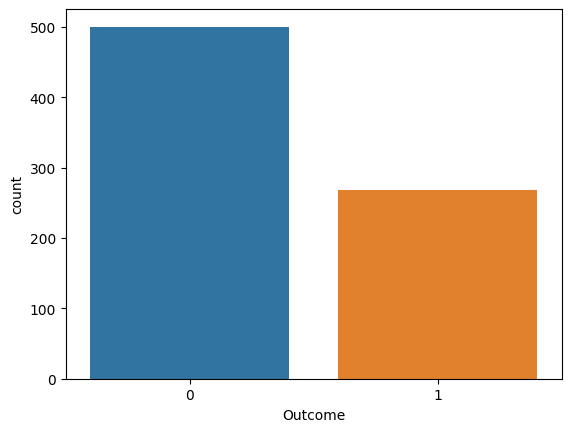

In [23]:
sns.countplot(x='Outcome', data=df)

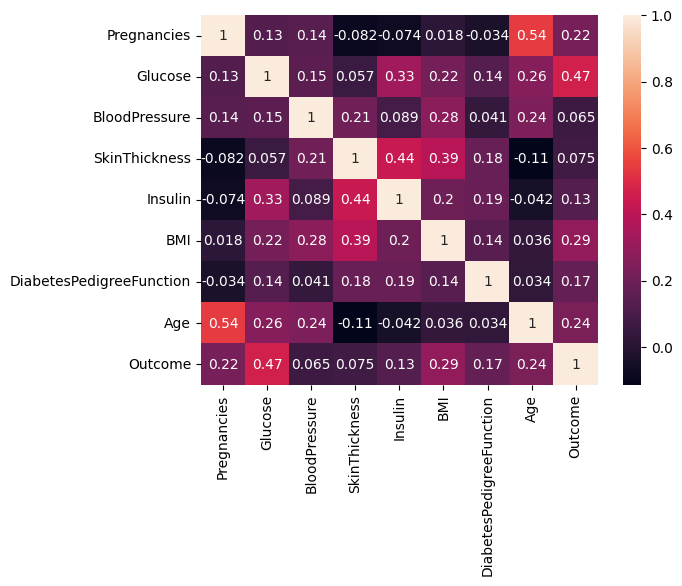

In [24]:
sns.heatmap(df.corr(), annot=True)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test  = train_test_split(df, test_size=0.20, random_state=42)

In [ ]:
predictor = TabularPredictor(label='Outcome', problem_type='binary', eval_metric='accuracy').fit(X_train, presets='best_quality')

In [ ]:
predictor.fit_summary()

In [46]:
leader_df = predictor.leaderboard()

                      model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.801303       1.116254  67.483301                0.001592           0.731760            2       True         14
1           CatBoost_BAG_L1   0.796417       0.028850  15.377792                0.028850          15.377792            1       True          7
2    NeuralNetFastAI_BAG_L1   0.794788       0.161084  26.954798                0.161084          26.954798            1       True         10
3           LightGBM_BAG_L1   0.793160       0.024221  12.595852                0.024221          12.595852            1       True          4
4            XGBoost_BAG_L1   0.791531       0.060553   9.545922                0.060553           9.545922            1       True         11
5         LightGBMXT_BAG_L1   0.789902       0.104718  21.430590                0.104718          21.430590            1       True          3

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

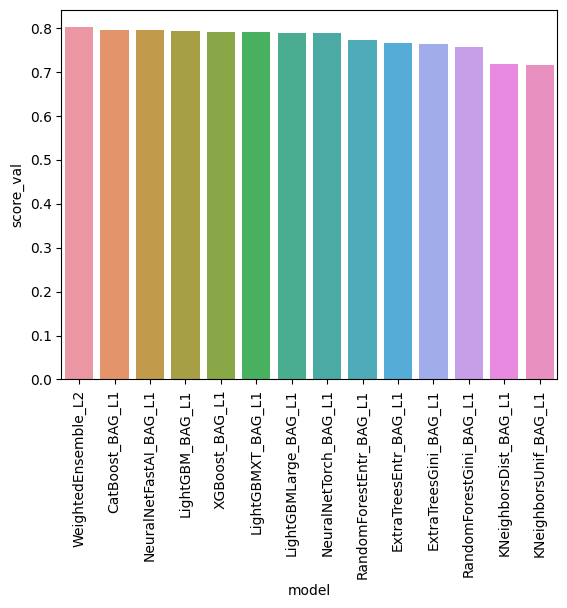

In [48]:
sns.barplot(x='model', y='score_val', data= leader_df)
plt.xticks(rotation=90)

In [45]:
predictor.evaluate(X_test)

INFO:autogluon.tabular.learner.abstract_learner:Evaluation: accuracy on test data: 0.7532467532467533
INFO:autogluon.tabular.learner.abstract_learner:Evaluations on test data:
INFO:autogluon.tabular.learner.abstract_learner:{
    "accuracy": 0.7532467532467533,
    "balanced_accuracy": 0.7272727272727273,
    "mcc": 0.4584348652606289,
    "roc_auc": 0.8303030303030302,
    "f1": 0.6481481481481481,
    "precision": 0.660377358490566,
    "recall": 0.6363636363636364
}


{'accuracy': 0.7532467532467533,
 'balanced_accuracy': 0.7272727272727273,
 'mcc': 0.4584348652606289,
 'roc_auc': 0.8303030303030302,
 'f1': 0.6481481481481481,
 'precision': 0.660377358490566,
 'recall': 0.6363636363636364}

In [31]:
y_pred = predictor.predict(X_test)

In [ ]:
X_train

In [35]:
y_test =X_test['Outcome']

In [36]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64

In [37]:
y_pred

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    0
462    0
Name: Outcome, Length: 154, dtype: int64

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

In [41]:
confusion_matrix(y_test, y_pred)

array([[81, 18],
       [20, 35]])

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

